In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# here we are importing a few packages we'll be using in this code.

In [44]:
import json
import requests
import time

# we're going to look at how much people in the insomnia subreddit talk about sleep.
SEARCH_TERM = 'sleep'
subreddit = "insomnia"
df_reddit_chunks = []

for i in range(1, 20): # we're looking back 20 days, one day at a time
    time.sleep(5) # necessary so the API doesn't get mad at us
    search_str = "https://api.pushshift.io/reddit/comment/search/?subreddit={}&size=500&after={}d&before={}d".format(
        subreddit, str(i), str(i - 1)
    )
    r = requests.get(search_str)
    reddit_data = r.json()['data']
    df = pd.DataFrame(reddit_data) # we're putting this in a fancy spreadsheet
    df_reddit_chunks.append(df)
    
df_reddit = pd.concat(df_reddit_chunks) # putting all the chunks together


In [45]:
df_reddit.columns, len(df_reddit)
# this is a list of all the information that's in our spreadsheet. 
# which columns look interesting to you?

(Index(['all_awardings', 'archived', 'associated_award', 'author',
        'author_flair_background_color', 'author_flair_css_class',
        'author_flair_richtext', 'author_flair_template_id',
        'author_flair_text', 'author_flair_text_color', 'author_flair_type',
        'author_fullname', 'author_patreon_flair', 'author_premium', 'body',
        'body_sha1', 'can_gild', 'collapsed', 'collapsed_because_crowd_control',
        'collapsed_reason', 'collapsed_reason_code', 'comment_type',
        'controversiality', 'created_utc', 'distinguished', 'gilded',
        'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
        'parent_id', 'permalink', 'retrieved_utc', 'score', 'score_hidden',
        'send_replies', 'stickied', 'subreddit', 'subreddit_id',
        'subreddit_name_prefixed', 'subreddit_type', 'top_awarded_type',
        'total_awards_received', 'treatment_tags', 'unrepliable_reason',
        'author_cakeday'],
       dtype='object'),
 1900)

(array([188., 210., 236., 222., 178., 181., 172., 139.,  82.,  48.,  43.,
         10.,  18.,   7.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        159.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <BarContainer object of 23 artists>)

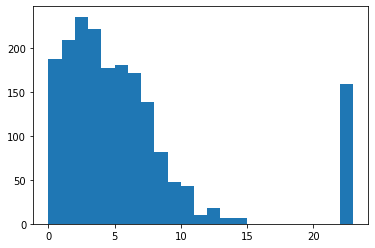

In [46]:
# now let's see what hours of the day people are posting.
# pd.to_datetime converts various timestamps into datetimes that computers can use.
df_reddit['hour_of_day'] = pd.to_datetime(df_reddit['created_utc'], unit='s').apply(lambda b: b.hour)
# then we can make a histogram of all the hours and count up how many posts there were
# at each hour of the night.
plt.hist(df_reddit['hour_of_day'], bins=[i for i in range(24)])

In [47]:
# how often are people talking about melatonin? 
# we can make a variable that tells us whether a post talks about melatonin
# and then take the average of that column!
df_reddit['key_in_body'] = df_reddit['body'].apply(lambda b: 'melatonin' in b)
df_reddit['key_in_body'].mean()

0.028421052631578948

In [88]:
import tweepy
SEARCH_TERM = 'snow'
bt = "AAAAAAAAAAAAAAAAAAAAAGu0TgEAAAAAhbwt8wcI2%2B7HTT8DTUiutbOM%2FZw%3DCVjxqMZ8eDZ7Zo5vFFs9Gdi1gc3ktbwJDg1KbCsABYbmVNODFd" # put your bearer token here
auth = tweepy.OAuth2BearerHandler(bt)
api = tweepy.API(auth)
res = api.search_tweets(
    '{} since:20220101'.format(SEARCH_TERM), 
    count=500, 
    geocode="42.365250,-71.105011,10mi" # lat/lon for Cambridge MA
)

(array([ 1.,  2.,  0.,  1.,  0.,  6.,  8.,  3.,  7.,  4.,  4.,  4.,  6.,
         4.,  5.,  5.,  2.,  7.,  5., 26.]),
 array([ 15.  ,  21.25,  27.5 ,  33.75,  40.  ,  46.25,  52.5 ,  58.75,
         65.  ,  71.25,  77.5 ,  83.75,  90.  ,  96.25, 102.5 , 108.75,
        115.  , 121.25, 127.5 , 133.75, 140.  ]),
 <BarContainer object of 20 artists>)

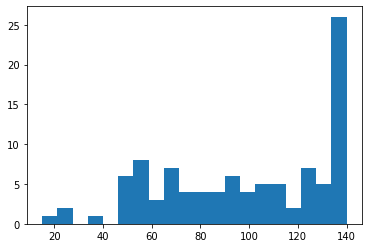

In [89]:
# how long are people's tweets?
plt.hist([len(r._json['text']) for r in res], bins=20)

In [91]:
import numpy as np
# how many tweets had the word 'weekend' in them?
np.mean(['weekend' in r._json['text'] for r in res])

0.0

In [101]:
# getting the timestamp tweets were created at and rounding them to the nearest minute
created_at_ts = [pd.to_datetime(r._json['created_at']).round('min') for r in res]

In [102]:
# how many times did we see each timestamp?
timestamps = {}
for ts in created_at_ts:
    if ts in timestamps:
        timestamps[ts] += 1
    else:
        timestamps[ts] = 1

xs = []
ys = []
for ts, count in timestamps.items():
    xs.append(ts)
    ys.append(count)
    


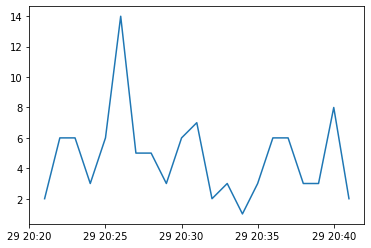

In [103]:
# here's a graph of how many times people tweeted over the last hour
plt.plot(xs, ys)